# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [12]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calcularMatrizConfusion(y_test, y_pred):    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1,figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show()

In [14]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [15]:
# check the shape of your data
spaceship.shape

(8693, 14)

In [16]:
#check for data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [17]:
# check for missing values 
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [18]:
# drop missing values
spaceship_clean = spaceship.dropna()
spaceship_clean.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [19]:
spaceship_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [20]:
spaceship_clean['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 6606, dtype: object

In [21]:
spaceship_clean['CryoSleep'] = spaceship_clean['CryoSleep'].astype(int)
spaceship_clean['VIP'] = spaceship_clean['VIP'].astype(int)

spaceship_clean = pd.get_dummies(spaceship_clean, columns = ['HomePlanet', 'Cabin', 'Destination'])

spaceship_boolean = spaceship_clean.select_dtypes(include=['bool']).columns
spaceship_clean[spaceship_boolean] = spaceship_clean[spaceship_boolean].astype(bool).astype(int)

/var/folders/4w/mwdnkfkx52791kd5fbxkfnsm0000gn/T/ipykernel_7366/3774266770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['CryoSleep'] = spaceship_clean['CryoSleep'].astype(int)
/var/folders/4w/mwdnkfkx52791kd5fbxkfnsm0000gn/T/ipykernel_7366/3774266770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['VIP'] = spaceship_clean['VIP'].astype(int)


In [22]:
# drop passengerid and name
spaceship_trans = spaceship_clean
spaceship_trans = spaceship_clean.drop(columns=["PassengerId", "Name"])

In [23]:
spaceship_trans

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_G/994/S,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Perform Train Test Split**

In [24]:
features = spaceship_trans.drop(columns=["Transported"], axis = 1)
target = spaceship_trans["Transported"]

In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [26]:
# normalize data
normalizer = MinMaxScaler()

normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [27]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [28]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_G/994/S,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm2 = normalizer.transform(X_train)
X_test_norm2 = normalizer.transform(X_test)
X_train_norm2 = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm2 = pd.DataFrame(X_test_norm, columns = X_test.columns)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [30]:
bagging_reg = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [31]:
bagging_reg.fit(X_train_norm, y_train)

,estimator,DecisionTreeC...(max_depth=20)
,n_estimators,100
,max_samples,1000
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


/opt/anaconda3/envs/jupyter-ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Accuracy 0.7866868381240545
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       661
           1       0.78      0.81      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



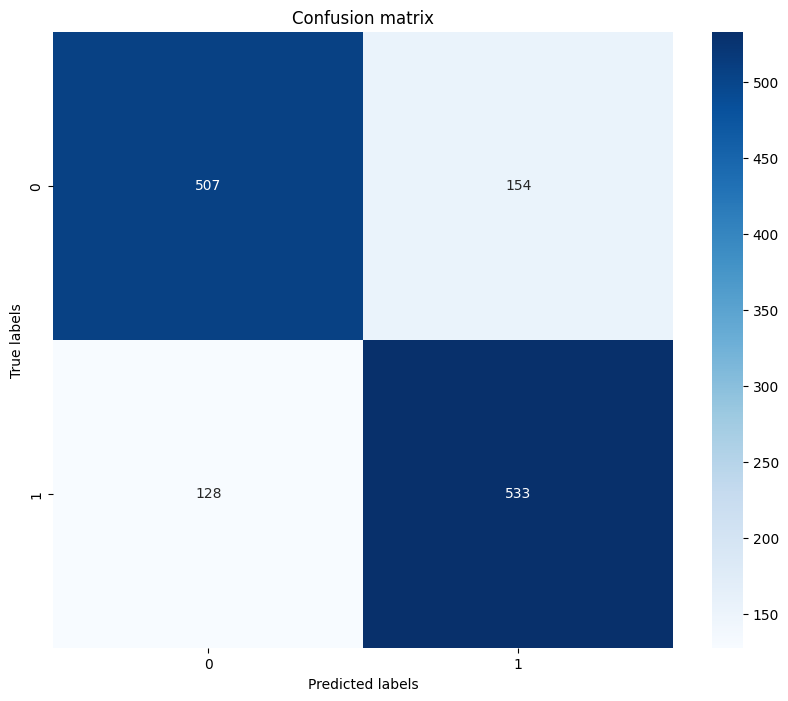

In [32]:
pred = bagging_reg.predict(X_test_norm)

acc_bagging = accuracy_score( y_test, pred)
print("Accuracy", accuracy_score( y_test, pred))
print(classification_report(y_test, pred))
calcularMatrizConfusion(y_test, pred)

- Random Forests

In [33]:
# Initialize a Random Forest
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)
# Training the model
forest.fit(X_train_norm, y_train)
# Evaluate the model
pred = forest.predict(X_test_norm)

acc_random_forest = accuracy_score( y_test, pred)
print("Accuracy", accuracy_score( y_test, pred))
print(classification_report(y_test, pred))

Accuracy 0.7314674735249622
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       661
           1       0.77      0.66      0.71       661

    accuracy                           0.73      1322
   macro avg       0.74      0.73      0.73      1322
weighted avg       0.74      0.73      0.73      1322



/opt/anaconda3/envs/jupyter-ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


- Gradient Boosting

In [36]:
# Initialize the model
gb_reg = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

# Training the model
gb_reg.fit(X_train_norm, y_train)

# Evaluate the model
pred = gb_reg.predict(X_test_norm)

acc_gradient_boosting = accuracy_score( y_test, pred)
print("Accuracy", accuracy_score( y_test, pred))
print(classification_report(y_test, pred))

Accuracy 0.7821482602118003
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       661
           1       0.77      0.81      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



/opt/anaconda3/envs/jupyter-ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


- Adaptive Boosting

In [37]:
# Initialize the model
ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100, learning_rate=0.1)
# Training the model
ada_reg.fit(X_train_norm, y_train)
# Evaluate the model
pred = ada_reg.predict(X_test_norm)

acc_adap_boosting = accuracy_score( y_test, pred)
print("Accuracy", accuracy_score( y_test, pred))
print(classification_report(y_test, pred))

/opt/anaconda3/envs/jupyter-ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Accuracy 0.7776096822995462
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       661
           1       0.77      0.80      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

# Para un clasificador binario:
print(f'ROC AUC: {roc_auc_score(y_test,ada_reg.predict_proba(X_test)[:, 1])}')

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       661
           1       0.77      0.80      0.78       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322

[[499 162]
 [132 529]]
ROC AUC: 0.778440496107992


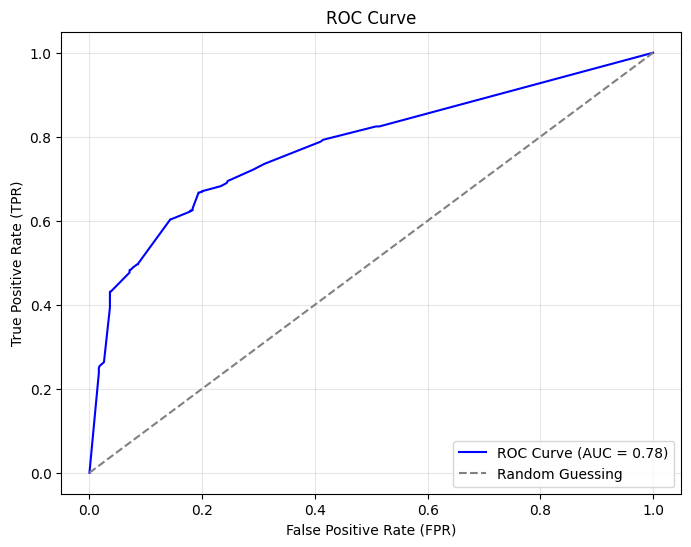

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = ada_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Which model is the best and why?

In [40]:
print(f'Accuracy of bagging and pasting: {acc_bagging} \n')
print(f'Accuracy of random forest: {acc_random_forest}\n')
print(f'Accuracy of gradient bosting: {acc_gradient_boosting}\n' )
print(f'Accuracy of adaptative bosting: {acc_adap_boosting}\n' )

Accuracy of bagging and pasting: 0.7866868381240545 

Accuracy of random forest: 0.7314674735249622

Accuracy of gradient bosting: 0.7821482602118003

Accuracy of adaptative bosting: 0.7776096822995462



In [ ]:
#The best model is random forest due to it has the highest accuracy